Load the modeled data, subtract the direct wave, plot seismic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read axes and data
xaxisfile = './well1/xaxis.bin'
taxisfile = './well1/antaxis.bin'
datafile_thin = './well1/fk-tr.bin'
datafile_backus  = './well_backus/fk-tr.bin'
datafile_direct  = './well2/fk-tr.bin'

xaxis = np.fromfile(xaxisfile,dtype='float32')
taxis = np.fromfile(taxisfile,dtype='float32')

data_thin = np.fromfile(datafile_thin,dtype='float32')
data_backus = np.fromfile(datafile_backus,dtype='float32')
data_direct = np.fromfile(datafile_direct,dtype='float32')

# subtract the direct wave
data_thin = data_thin - data_direct
data_backus = data_backus - data_direct

ndata = len(data_thin)
ntaxis = len(taxis)
nxaxis = len(xaxis)
assert ndata==ntaxis*nxaxis


# Reshaping data
data_thin = data_thin.reshape((nxaxis,ntaxis))
data_backus = data_backus.reshape((nxaxis,ntaxis))

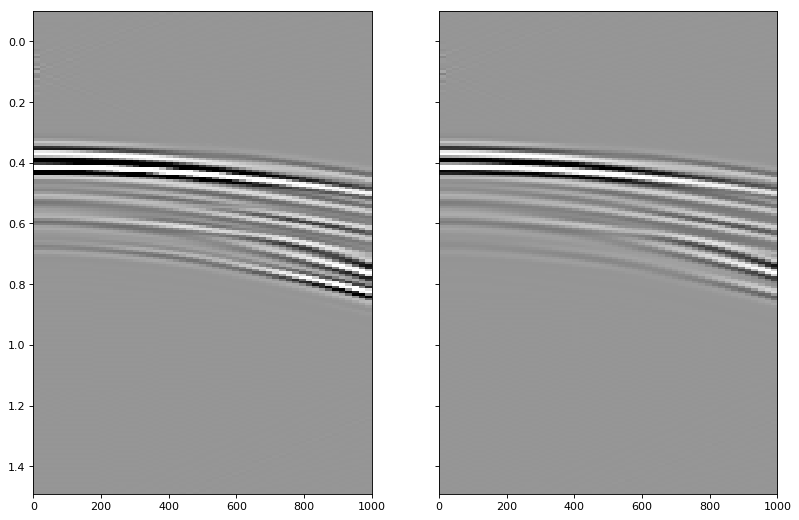

In [3]:
drange = [np.amin(xaxis), np.amax(xaxis), np.amax(taxis), np.amin(taxis)];
vm = np.percentile(data_thin, 99)

fig, axs = plt.subplots(1, 2, figsize=(12, 8), dpi= 80, sharey=True)

#fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
axs[0].imshow(data_thin.T, cmap="Greys", vmin=-vm, vmax=vm, aspect='auto', extent=drange)
axs[1].imshow(data_backus.T, cmap="Greys", vmin=-vm, vmax=vm, aspect='auto', extent=drange)